In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import h5py
from sklearn.cluster import HDBSCAN

# Plots for new protein families

In [2]:
updated_data = pd.read_excel('out/data/5255_toxins.xlsx')
updated_data['protein_family_NEW'] = updated_data['protein_family_NEW'].astype(str)
updated_data

,Unnamed: 0,Entry,Entry Name,Protein names,Gene Names,Organism,Domain [FT],Protein families,Sequence similarities,Sequence,X,Y,cluster_labels,Pfam,Gene3D,cluster_labels_NEW,protein_family_NEW,shortened_labels
0,5254,P0CI21,TE53_HASHE,Augerpeptide hhe53,0,Hastula hectica (Sea snail) (Impages hectica),0,0,0,GLSQSGCQAFTGRWCVGCERLRSRVVWECSPKRVVNSI,0.986561,0.596046,-1,0,0,-1,0,0
1,2784,P83608,TDM1A_MISBR,Delta-actinopoditoxin-Mb1a (Delta-AOTX-Mb1a) (...,0,Missulena bradleyi (Eastern mouse spider),0,Neurotoxin 06 (delta-actx) family,SIMILARITY: Belongs to the neurotoxin 06 (delt...,CAKKREWCAKTEDCCCPMKCIYAWYNEQSSCQTTFSGMFKKC,0.547305,0.458469,-1,PF05453;,0,-1,Neurotoxin 06 (delta-actx) family,0
2,1145,Q2I2R5,CLE1_CONLT,Alpha-conotoxin Lt14.1 (Alpha-L-conotoxin Lt14...,0,Conus litteratus (Lettered cone),0,Conotoxin L superfamily,SIMILARITY: Belongs to the conotoxin L superfa...,MKLSVMFIVFLMLTMPMTCAGISRSATNGGEADVRAHDKAANLMAL...,0.359073,0.499512,-1,PF05294;,0,-1,Conotoxin L superfamily,0
3,2786,P83621,TXC1C_CUPSA,Cupiennin-1c (Cu-1c) (M-ctenitoxin-Cs1c) (M-CN...,0,Cupiennius salei (American wandering spider),0,"Cationic peptide 04 (cupiennin) family, 01 sub...",SIMILARITY: Belongs to the cationic peptide 04...,GFGSLFKFLAKKVAKTVAKQAAKQGAKYIANKQTE,0.378457,0.444605,-1,PF00537;,3.30.30.10;,-1,"Cationic peptide 04 (cupiennin) family, 01 sub...",0
4,2787,P83622,TXC1D_CUPSA,Cupiennin-1d (Cu-1d) (M-ctenitoxin-Cs1d) (M-CN...,0,Cupiennius salei (American wandering spider),0,"Cationic peptide 04 (cupiennin) family, 01 sub...",SIMILARITY: Belongs to the cationic peptide 04...,GFGSLFKFLAKKVAKTVAKQAAKQGAKYVANKHME,0.506884,0.440755,-1,0,2.10.60.10;,-1,"Cationic peptide 04 (cupiennin) family, 01 sub...",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5250,3649,B6DD34,TXE01_LYCSI,U14-lycotoxin-Ls1a (Toxin-like structure LSTX-N1),0,Lycosa singoriensis (Wolf spider) (Aranea sing...,"DOMAIN 21..66; /note=""WAP""","Venom protein 11 family, 01 (wap-1) subfamily",SIMILARITY: Belongs to the venom protein 11 fa...,MNSKVFAVLLLLALSTCVLSEKYCPTPRNTSCKKMNIRNNCCRDSD...,0.100095,0.550026,33,0,0,30,Venom protein 11 family,VP11
5251,3596,B6DCY1,TXK04_LYCSI,U20-lycotoxin-Ls1d (Toxin-like structure LSTX-Q4),0,Lycosa singoriensis (Wolf spider) (Aranea sing...,"DOMAIN 31..76; /note=""WAP""","Venom protein 11 family, 02 (wap-2) subfamily",SIMILARITY: Belongs to the venom protein 11 fa...,MFSTSDQVSKMNSRILSALLILGIATCVIAGGFCPKSRHPQCNLSY...,0.103569,0.561239,33,PF10530;,0,30,Venom protein 11 family,VP11
5252,4172,P0CH55,NTA_CHIGU,Jingzhaotoxin F7-15.33 (Peptide F7-15.33),0,Chilobrachys guangxiensis (Chinese earth tiger...,0,Neurotoxin 10 (Hwtx-1) family,SIMILARITY: Belongs to the neurotoxin 10 (Hwtx...,LCSREGEFCYKLRKCCAGFYCKAFVLHCYRN,0.119162,0.577670,33,0,0,-1,Neurotoxin 10 (Hwtx-1) family,0
5253,3660,B6DD45,TXF12_LYCSI,U15-lycotoxin-Ls1c (Toxin-like structure LSTX-...,0,Lycosa singoriensis (Wolf spider) (Aranea sing...,"DOMAIN 21..66; /note=""WAP""","Venom protein 11 family, 01 (wap-1) subfamily",SIMILARITY: Belongs to the venom protein 11 fa...,MNSKIFAVLLLLAFLSCVLSDQYCPKSSITACKKMNIRNDCCKDDD...,0.106196,0.549323,33,0,0,30,Venom protein 11 family,VP11


In [4]:
no_noise = updated_data[updated_data['cluster_labels_NEW'] != -1]
no_noise

,Unnamed: 0,Entry,Entry Name,Protein names,Gene Names,Organism,Domain [FT],Protein families,Sequence similarities,Sequence,X,Y,cluster_labels,Pfam,Gene3D,cluster_labels_NEW,protein_family_NEW,shortened_labels
1671,1778,D5LMJ3,VM3A_NAJAT,Zinc metalloproteinase-disintegrin-like atrase...,0,Naja atra (Chinese cobra),"DOMAIN 205..398; /note=""Peptidase M12B""; /evid...","Venom metalloproteinase (M12B) family, P-III s...",SIMILARITY: Belongs to the venom metalloprotei...,MIQALLVIICLAVFPHQGSSIILESGNVNDYEVVYPQKVPALLKGG...,0.212658,0.719103,0,PF07740;,0,0,"Disintegrin, Venom Metalloproteinase (M12B) fa...",VMP
1672,1850,J3SBP9,VM28_CROAD,Zinc metalloproteinase-disintegrin 8 (EC 3.4.2...,0,Crotalus adamanteus (Eastern diamondback rattl...,"DOMAIN 198..396; /note=""Peptidase M12B""; /evid...","Venom metalloproteinase (M12B) family, P-II su...",SIMILARITY: Belongs to the venom metalloprotei...,MIQVLLVTICLAVFPYQGSSIILESGNVNDYEVVYPRKVTALPKGA...,0.216059,0.722131,0,PF08092;,0,0,"Disintegrin, Venom Metalloproteinase (M12B) fa...",VMP
1673,1853,J3SDW8,VM38_CROAD,Zinc metalloproteinase-disintegrin-like 8 (EC ...,0,Crotalus adamanteus (Eastern diamondback rattl...,"DOMAIN 199..395; /note=""Peptidase M12B""; /evid...","Venom metalloproteinase (M12B) family, P-III s...",SIMILARITY: Belongs to the venom metalloprotei...,MIQVLLVTICLAVFPYQGSSIILGSGNVNDYEVVYPRKVTALPKGA...,0.213971,0.717861,0,PF07740;,0,0,"Disintegrin, Venom Metalloproteinase (M12B) fa...",VMP
1674,1852,J3SDW6,VM32D_CROAD,Zinc metalloproteinase-disintegrin-like 2d (EC...,0,Crotalus adamanteus (Eastern diamondback rattl...,"DOMAIN 199..395; /note=""Peptidase M12B""; /evid...","Venom metalloproteinase (M12B) family, P-III s...",SIMILARITY: Belongs to the venom metalloprotei...,MIQVLLVTICLAVFPYQGSSIILGSGNVNDYEVVYPRKVTALPKGA...,0.215101,0.717718,0,PF07740;,0,0,"Disintegrin, Venom Metalloproteinase (M12B) fa...",VMP
1675,1844,J3S829,VM32A_CROAD,Zinc metalloproteinase-disintegrin-like 2a (EC...,0,Crotalus adamanteus (Eastern diamondback rattl...,"DOMAIN 199..395; /note=""Peptidase M12B""; /evid...","Venom metalloproteinase (M12B) family, P-III s...",SIMILARITY: Belongs to the venom metalloprotei...,MIQVLLVTICLAVFPYQGSSIILGSGNVNDYEVVYPRKVTALPKGA...,0.215406,0.718157,0,PF07740;,0,0,"Disintegrin, Venom Metalloproteinase (M12B) fa...",VMP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5249,3650,B6DD35,TXE02_LYCSI,U14-lycotoxin-Ls1a (Toxin-like structure LSTX-N2),0,Lycosa singoriensis (Wolf spider) (Aranea sing...,"DOMAIN 21..66; /note=""WAP""","Venom protein 11 family, 01 (wap-1) subfamily",SIMILARITY: Belongs to the venom protein 11 fa...,MNSKVFAALLLLALSTCVLSEKYCPTPRNTSCKKMNIRNNCCRDSD...,0.099673,0.553009,33,0,0,30,Venom protein 11 family,VP11
5250,3649,B6DD34,TXE01_LYCSI,U14-lycotoxin-Ls1a (Toxin-like structure LSTX-N1),0,Lycosa singoriensis (Wolf spider) (Aranea sing...,"DOMAIN 21..66; /note=""WAP""","Venom protein 11 family, 01 (wap-1) subfamily",SIMILARITY: Belongs to the venom protein 11 fa...,MNSKVFAVLLLLALSTCVLSEKYCPTPRNTSCKKMNIRNNCCRDSD...,0.100095,0.550026,33,0,0,30,Venom protein 11 family,VP11
5251,3596,B6DCY1,TXK04_LYCSI,U20-lycotoxin-Ls1d (Toxin-like structure LSTX-Q4),0,Lycosa singoriensis (Wolf spider) (Aranea sing...,"DOMAIN 31..76; /note=""WAP""","Venom protein 11 family, 02 (wap-2) subfamily",SIMILARITY: Belongs to the venom protein 11 fa...,MFSTSDQVSKMNSRILSALLILGIATCVIAGGFCPKSRHPQCNLSY...,0.103569,0.561239,33,PF10530;,0,30,Venom protein 11 family,VP11
5253,3660,B6DD45,TXF12_LYCSI,U15-lycotoxin-Ls1c (Toxin-like structure LSTX-...,0,Lycosa singoriensis (Wolf spider) (Aranea sing...,"DOMAIN 21..66; /note=""WAP""","Venom protein 11 family, 01 (wap-1) subfamily",SIMILARITY: Belongs to the venom protein 11 fa...,MNSKIFAVLLLLAFLSCVLSDQYCPKSSITACKKMNIRNDCCKDDD...,0.106196,0.549323,33,0,0,30,Venom protein 11 family,VP11


In [5]:
def plot_scatter(data, cluster_label_col, rainbow):
    unique_labels = sorted(data[cluster_label_col].unique().tolist())

    plt.figure(figsize=(8, 6), dpi=250) 
    non_noise_labels = [label for label in unique_labels if label != -1]
    cmap = plt.get_cmap(rainbow, len(non_noise_labels))
    
    color_map = {label: cmap(i) for i, label in enumerate(non_noise_labels)}
    color_map[-1] = 'black' 
    
    for label in unique_labels:
        cluster_data = data[data['cluster_labels_NEW'] == label]
        plt.scatter(cluster_data['X'], cluster_data['Y'], s=0.5, label=label, color=color_map[label])
    
    plt.legend(fontsize='5.5', bbox_to_anchor=(1.15, 1), ncol=2, markerscale=5)
    plt.savefig(f'/Users/selinturkoglu/PycharmProjects/pa/out/clustered_NEW_{rainbow}.png', dpi=250, bbox_inches='tight')
    plt.show()

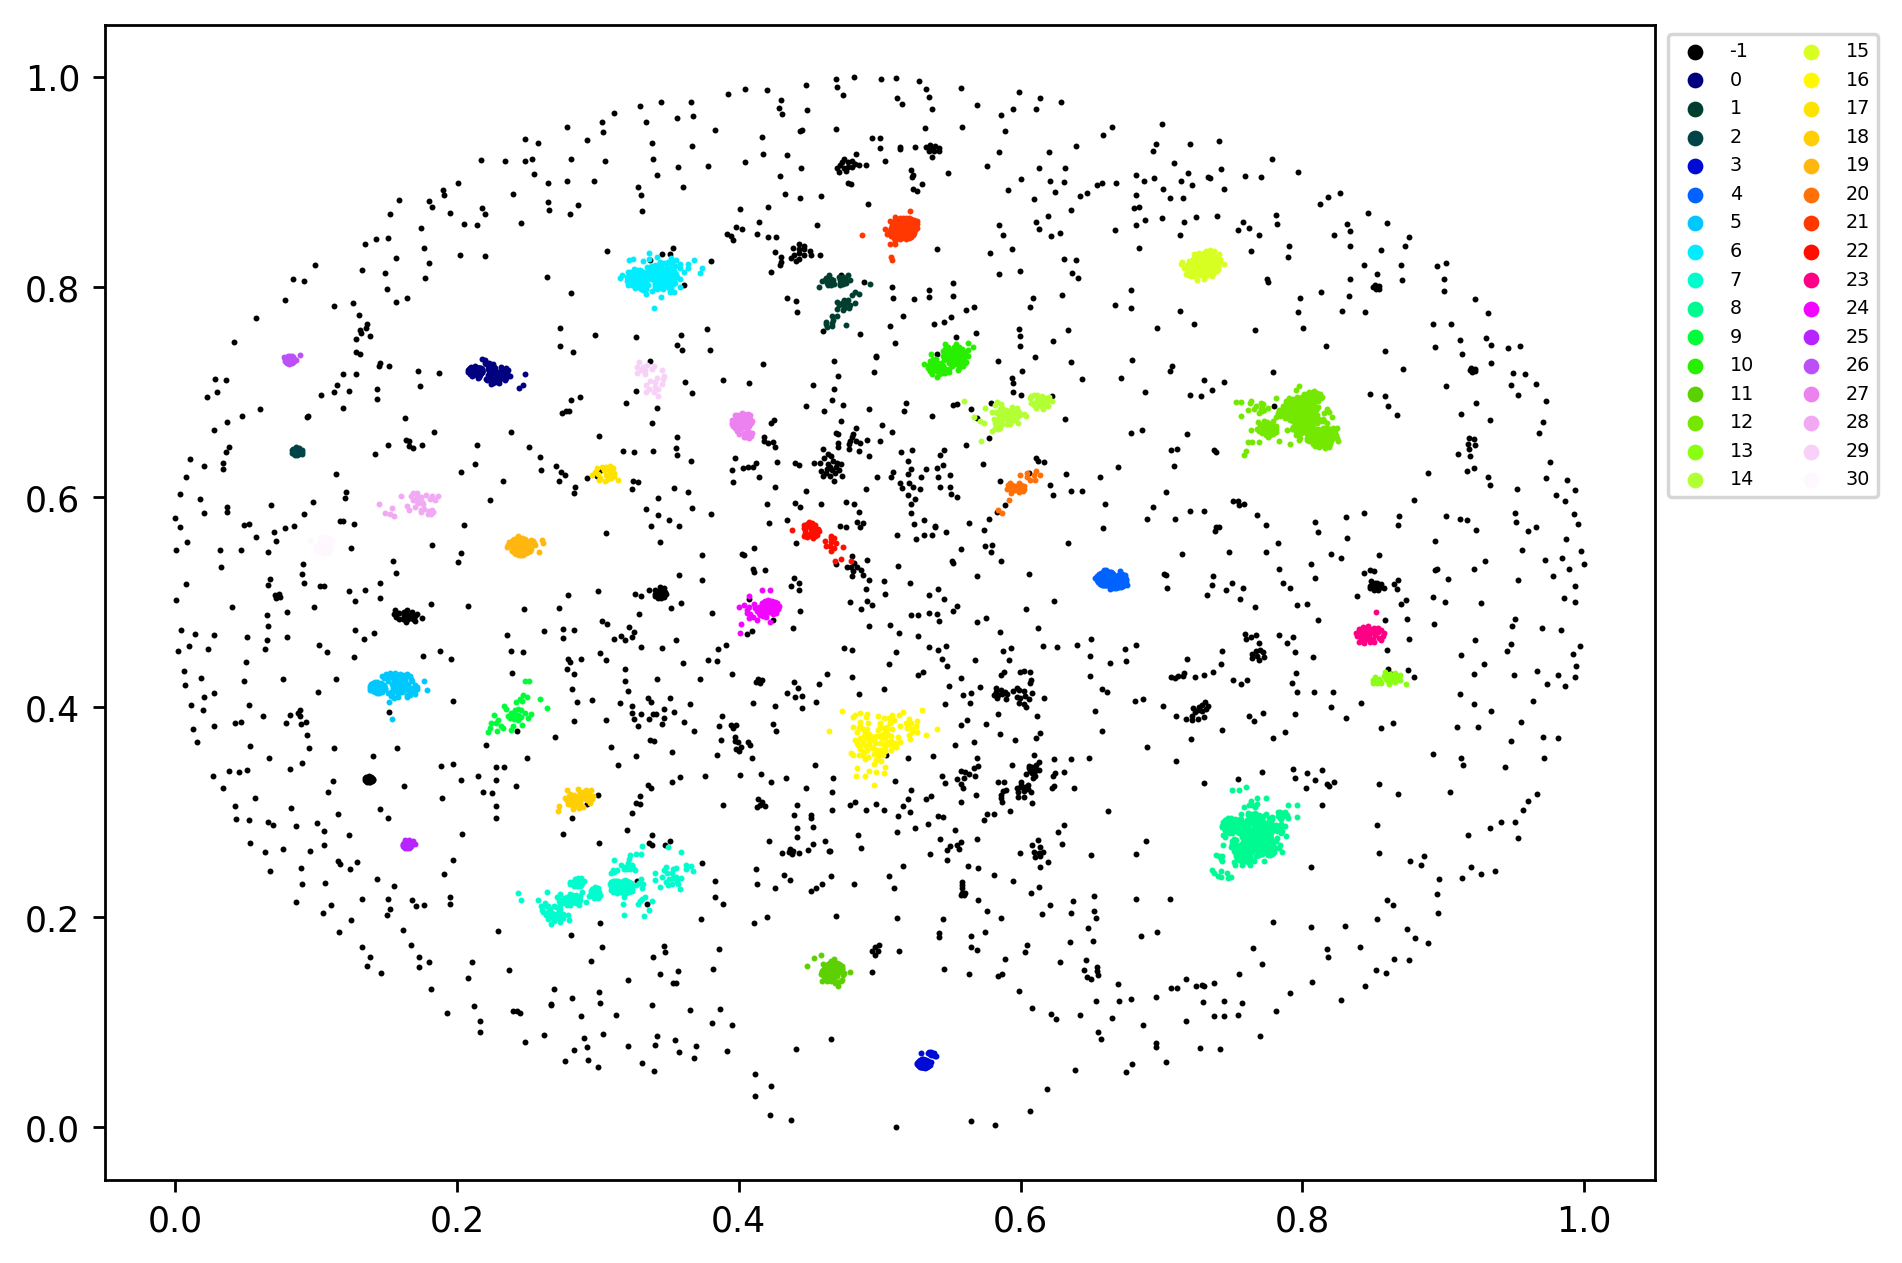

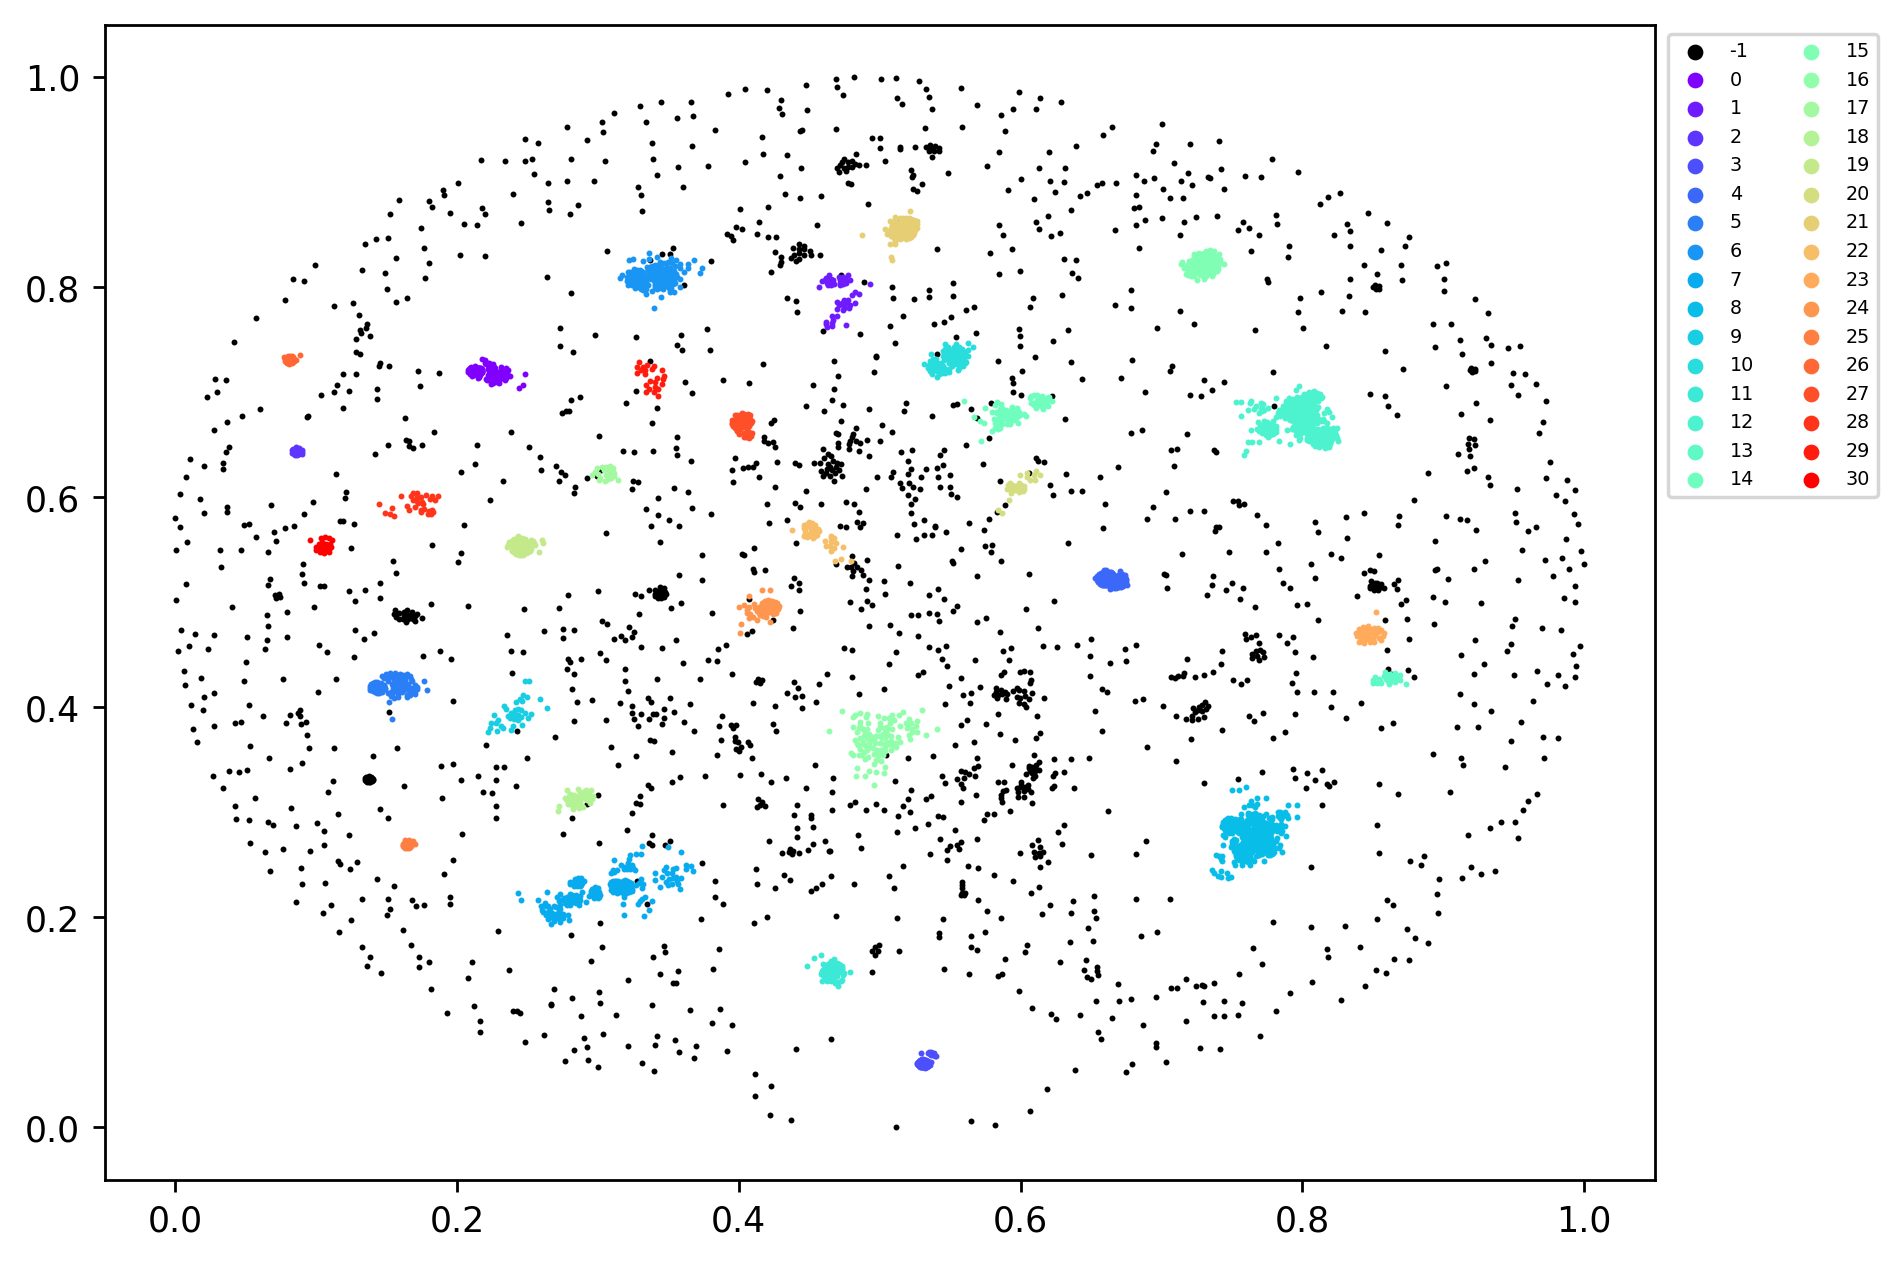

In [6]:
# plot updated scatter plot
plot_scatter(updated_data, 'cluster_labels_NEW', 'gist_ncar')
plot_scatter(updated_data, 'cluster_labels_NEW', 'rainbow')

In [7]:
new_grouping = updated_data.groupby('cluster_labels_NEW').agg({
    'protein_family_NEW': lambda x: [item.strip() for item in x if item.strip()],
}).reset_index()

new_grouping['protein_family_NEW_counts'] = new_grouping['protein_family_NEW'].apply(lambda x: pd.Series(x).value_counts().to_dict())
new_grouping

,cluster_labels_NEW,protein_family_NEW,protein_family_NEW_counts
0,-1,"[0, Neurotoxin 06 (delta-actx) family, Conotox...","{'0': 277, 'Conotoxin M superfamily': 69, 'Bra..."
1,0,"[Disintegrin, Venom Metalloproteinase (M12B) f...","{'Disintegrin, Venom Metalloproteinase (M12B) ..."
2,1,"[Insulin family, Conotoxin T superfamily, Insu...","{'Conotoxin T superfamily': 26, 'Insulin famil..."
3,2,"[Arthropod phospholipase D family, Arthropod p...",{'Arthropod phospholipase D family': 26}
4,3,"[Peptidase S1 family, Peptidase S1 family, Pep...",{'Peptidase S1 family': 150}
5,4,"[Phospholipase A2 family, Group II subfamily, ...","{'Phospholipase A2 family, Group II subfamily'..."
6,5,"[Venom Kunitz-type family, Venom Kunitz-type f...",{'Venom Kunitz-type family': 115}
7,6,"[Conotoxin O1 superfamily, Conotoxin O1 superf...",{'Conotoxin O1 superfamily': 196}
8,7,"[Neurotoxin 10 (Hwtx-1) family, Neurotoxin 10 ...",{'Neurotoxin 10 (Hwtx-1) family': 251}
9,8,"[Snake three-finger toxin family, Short-chain ...","{'Snake three-finger toxin family, Short-chain..."


In [8]:
def plot_new_single_cluster_contents(cluster_df, cluster_label, column_name, title):
    counts = cluster_df.loc[cluster_df['cluster_labels_NEW'] == cluster_label, column_name + '_counts'].values[0]

    if cluster_label == -1:
        fig, ax = plt.subplots(figsize=(5, 50))
    else:
        fig, ax = plt.subplots(figsize=(10, 6))
    ax.barh(list(counts.keys()), list(counts.values()))
    
    # calculating the protein counts and averaged col values in each cluster
    cluster_prot_count = (updated_data['cluster_labels_NEW'] == cluster_label).sum()
    unique_labels = updated_data.loc[updated_data['cluster_labels_NEW'] == cluster_label, column_name].nunique()
    col_label_count = updated_data[(updated_data['cluster_labels_NEW'] == cluster_label) & (updated_data[column_name] != '0')].value_counts().sum()
        
    ax.set_title(f'{title}\n'
                 f'protein count: {cluster_prot_count}, unique {column_name} count: {unique_labels}\n'
                 f'#{column_name} without nan/#proteins: {round((col_label_count/cluster_prot_count),4)} \n'
                 f'#distinct {column_name}/#proteins: {round((unique_labels/cluster_prot_count),4)}')
    ax.set_xlabel('Count')
    ax.set_ylabel(column_name.capitalize())
    
    plt.savefig(f'out/{column_name}/{column_name}_{cluster_label}.png', dpi=250, bbox_inches='tight')
    plt.show()

In [9]:
#for cluster in new_grouping['cluster_labels_NEW']:
#    plot_new_single_cluster_contents(new_grouping,cluster,"protein_family_NEW", f"Cluster {cluster} NEW Protein Family Distribution")

In [10]:
def plot_stacked_cluster_contents(cluster_df, column_name, title, cluster_labels, legend_cols=None, noise=False):
    if legend_cols is None:
        legend_cols = 8
    
    # Initialize figure and axis
    fig, ax = plt.subplots(figsize=(15, 7))
    bar_width = 0.35
    
    # Filter unique values to exclude those identified for exclusion
    unique_values = sorted({key for counts in cluster_df[column_name + '_counts'] for key in counts.keys()})
    unique_cluster_labels = sorted(set(cluster_df[cluster_labels]))
    
    # Create stacked bar chart data
    stacked_data = {value: [] for value in unique_values}
    bar_positions = range(len(unique_cluster_labels))
    
    for label, counts in zip(cluster_df[cluster_labels], cluster_df[column_name + '_counts']):
        for value in unique_values:
            stacked_data[value].append(counts.get(value, 0))
    
    # Initialize bottom position for each bar segment
    bottom = np.zeros(len(unique_cluster_labels))
    
    # Use the 'gist_ncar' colormap
    cmap = plt.cm.gist_ncar
    
    # Plot stacked bars
    for i, value in enumerate(unique_values):
        counts = stacked_data[value]
        color = cmap(float(i) / len(unique_values))
        ax.bar(bar_positions, counts, width=bar_width, label=value, color=color, bottom=bottom)
        bottom += counts
    
    ax.set_title(title)
    ax.set_xlabel('Cluster Labels')
    ax.set_ylabel('Count')
    ax.set_ylim(0, 500)  # Adjust this as needed
    ax.set_xticks(bar_positions)
    ax.set_xticklabels(unique_cluster_labels)
    
    # Place the legend outside the plot
    ax.legend(title=column_name, bbox_to_anchor=(0, -0.1), ncol=legend_cols, loc='upper left')
    if noise:
        plt.savefig(f'out/{column_name}/{column_name}_noise_stacked.png', dpi=250, bbox_inches='tight')
    else:
        plt.ylim(0, 500)
        plt.savefig(f'out/{column_name}/{column_name}_no_noise_stacked.png', dpi=250, bbox_inches='tight')
    
    # Save and display the plot
    plt.show()

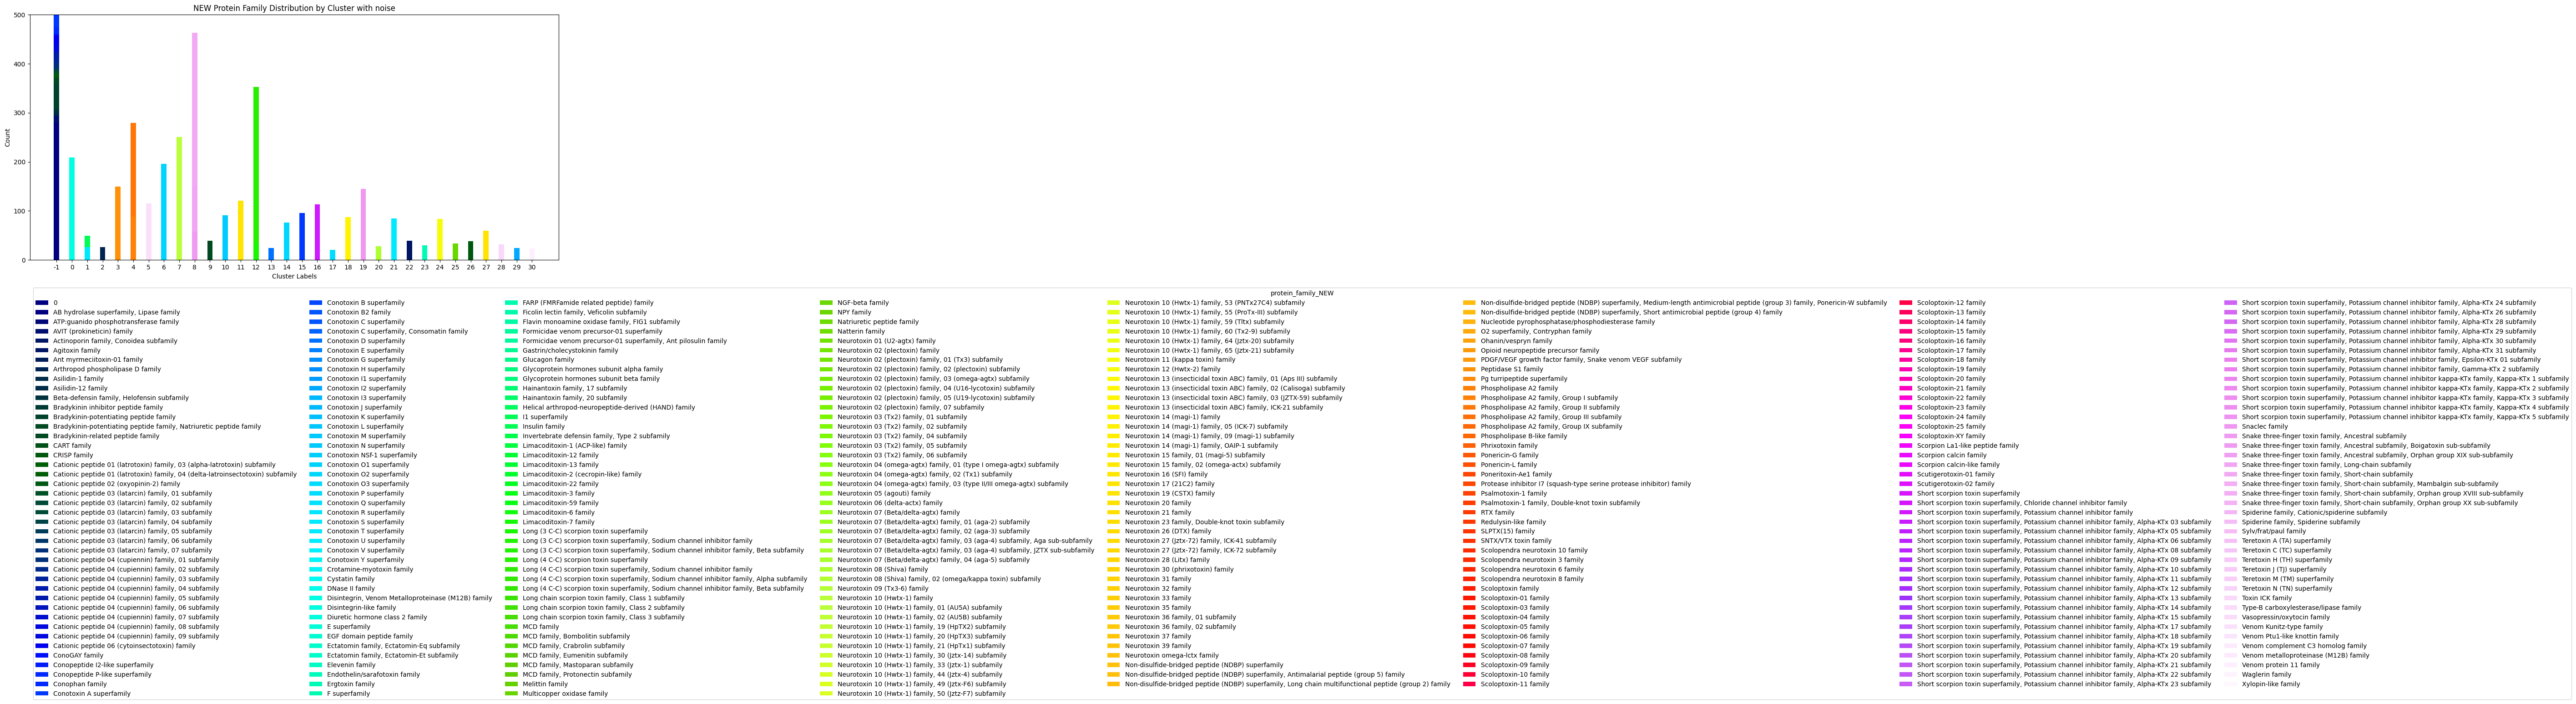

In [11]:
plot_stacked_cluster_contents(new_grouping, 'protein_family_NEW', 'NEW Protein Family Distribution by Cluster with noise', 'cluster_labels_NEW', None, True)

### plot without noise

In [12]:
new_grouping = no_noise.groupby('cluster_labels_NEW').agg({
    'protein_family_NEW': lambda x: [item.strip() for item in x if item.strip()],
}).reset_index()

new_grouping['protein_family_NEW_counts'] = new_grouping['protein_family_NEW'].apply(lambda x: pd.Series(x).value_counts().to_dict())
new_grouping

,cluster_labels_NEW,protein_family_NEW,protein_family_NEW_counts
0,0,"[Disintegrin, Venom Metalloproteinase (M12B) f...","{'Disintegrin, Venom Metalloproteinase (M12B) ..."
1,1,"[Insulin family, Conotoxin T superfamily, Insu...","{'Conotoxin T superfamily': 26, 'Insulin famil..."
2,2,"[Arthropod phospholipase D family, Arthropod p...",{'Arthropod phospholipase D family': 26}
3,3,"[Peptidase S1 family, Peptidase S1 family, Pep...",{'Peptidase S1 family': 150}
4,4,"[Phospholipase A2 family, Group II subfamily, ...","{'Phospholipase A2 family, Group II subfamily'..."
5,5,"[Venom Kunitz-type family, Venom Kunitz-type f...",{'Venom Kunitz-type family': 115}
6,6,"[Conotoxin O1 superfamily, Conotoxin O1 superf...",{'Conotoxin O1 superfamily': 196}
7,7,"[Neurotoxin 10 (Hwtx-1) family, Neurotoxin 10 ...",{'Neurotoxin 10 (Hwtx-1) family': 251}
8,8,"[Snake three-finger toxin family, Short-chain ...","{'Snake three-finger toxin family, Short-chain..."
9,9,"[Bradykinin-potentiating peptide family, Natri...","{'Bradykinin-potentiating peptide family, Natr..."


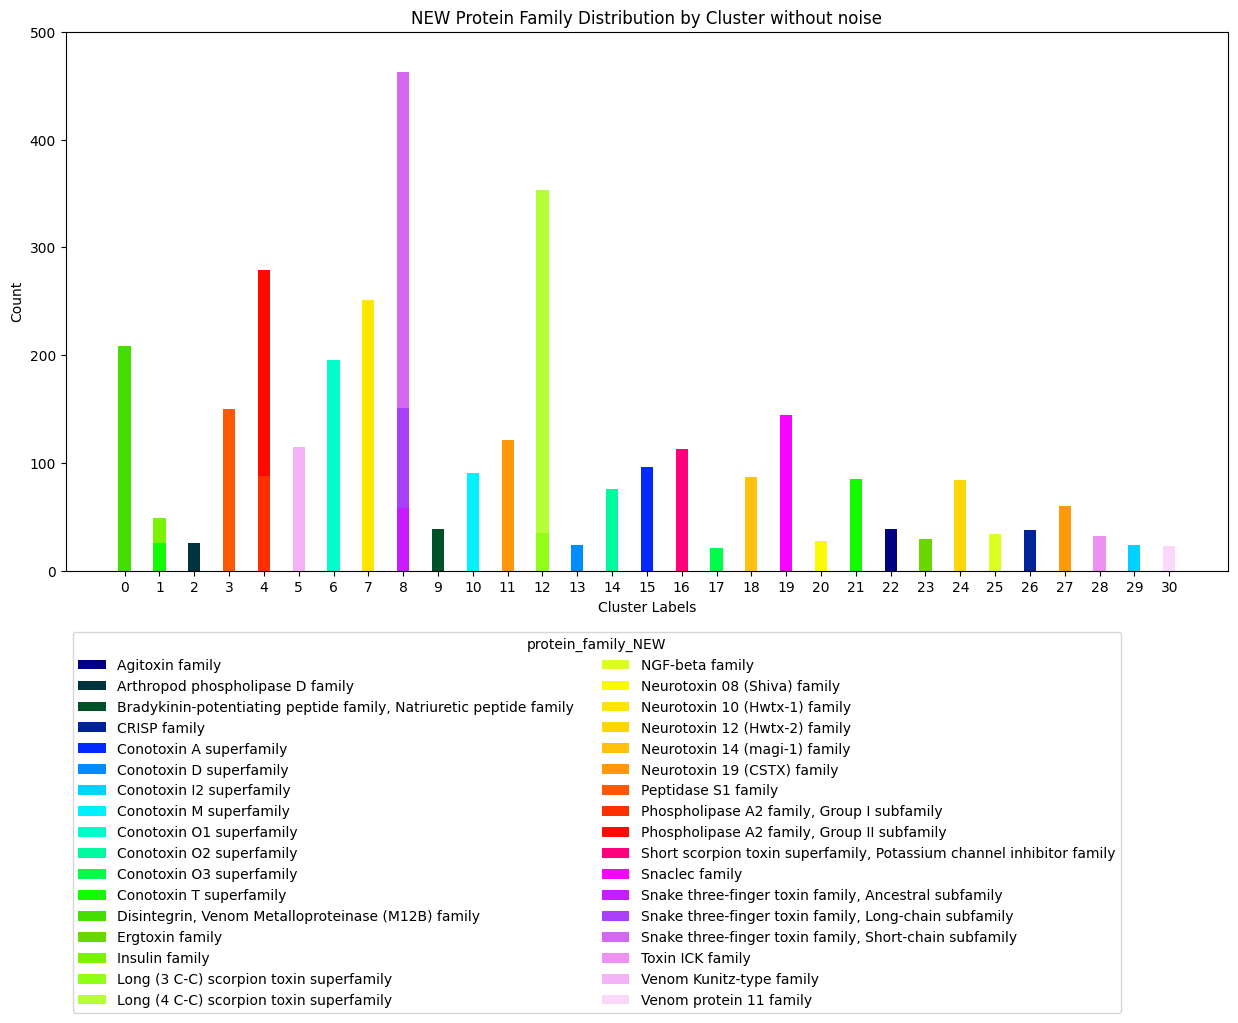

In [13]:
plot_stacked_cluster_contents(new_grouping,
                              'protein_family_NEW',
                              'NEW Protein Family Distribution by Cluster without noise',
                              'cluster_labels_NEW',
                              2,
                              False)

In [14]:
# CSV for Tobias to do the embeddings/PCA
#csv = updated_data[['Entry', 'cluster_labels_NEW']]
#csv.to_csv('out/data/toxins_with_labels.csv', index=False)

## adding embeddings to the dataset

In [3]:
def print_structure(name, obj):
    if isinstance(obj, h5py.Group):
        print(f"Group: {name}")
    elif isinstance(obj, h5py.Dataset):
        print(f"Dataset: {name}, shape: {obj.shape}, dtype: {obj.dtype}")

path = 'data/toxin_prott5.h5'
with h5py.File(path, 'r') as f:
    f.visititems(print_structure)


Dataset: sp|A0A023VZM6|TX41C_ETHRU, shape: (1, 1024), dtype: float16
Dataset: sp|A0A023VZR2|TX81A_CORWE, shape: (1, 1024), dtype: float16
Dataset: sp|A0A023W082|TX41B_ETHRU, shape: (1, 1024), dtype: float16
Dataset: sp|A0A023W090|TX41E_ETHRU, shape: (1, 1024), dtype: float16
Dataset: sp|A0A023W0B6|TX85A_ETHRU, shape: (1, 1024), dtype: float16
Dataset: sp|A0A023W0C3|TX85D_ETHRU, shape: (1, 1024), dtype: float16
Dataset: sp|A0A023W0U0|TX41D_ETHRU, shape: (1, 1024), dtype: float16
Dataset: sp|A0A023W0V6|TX93A_SCOMO, shape: (1, 1024), dtype: float16
Dataset: sp|A0A023W0V9|TX85C_ETHRU, shape: (1, 1024), dtype: float16
Dataset: sp|A0A023W0W9|TX85A_SCOMO, shape: (1, 1024), dtype: float16
Dataset: sp|A0A023W123|TX41A_ETHRU, shape: (1, 1024), dtype: float16
Dataset: sp|A0A023W140|TXX1A_ETHRU, shape: (1, 1024), dtype: float16
Dataset: sp|A0A023W145|TXX1B_ETHRU, shape: (1, 1024), dtype: float16
Dataset: sp|A0A023W157|TX85B_ETHRU, shape: (1, 1024), dtype: float16
Dataset: sp|A0A023W163|TX85E_ETHRU

In [4]:
with h5py.File(path, 'r') as h5_file:
    dfs = []
    # Iterate over each dataset
    for dataset in h5_file.keys():
        data = np.array(h5_file[dataset])  # Convert dataset to NumPy array
        df = pd.DataFrame(data)            # Convert NumPy array to DataFrame
        df['dataset_name'] = dataset       # Add name column
        dfs.append(df)
    
    embeddings = pd.concat(dfs, ignore_index=True)
embeddings

,0,1,2,3,4,5,6,7,8,9,...,1015,1016,1017,1018,1019,1020,1021,1022,1023,dataset_name
0,0.010834,-0.018158,0.089966,-0.033936,-0.041656,-0.046631,0.026016,-0.149658,-0.009277,-0.025665,...,-0.014687,-0.026978,-0.079773,0.018433,0.079163,0.032684,0.072876,0.074768,-0.003670,sp|A0A023VZM6|TX41C_ETHRU
1,-0.007896,0.023758,0.158813,-0.040436,-0.034454,-0.104858,0.026581,-0.232422,-0.009399,0.100525,...,-0.055634,0.024338,-0.075134,0.012703,0.094604,-0.022736,0.012314,0.098450,0.042633,sp|A0A023VZR2|TX81A_CORWE
2,0.014282,-0.023453,0.081177,-0.031311,-0.042267,-0.047302,0.026184,-0.148193,-0.004047,-0.032318,...,-0.021057,-0.023682,-0.079285,0.023209,0.079468,0.027115,0.070984,0.072937,-0.009064,sp|A0A023W082|TX41B_ETHRU
3,0.004341,-0.012032,0.098450,-0.027145,-0.066345,-0.038879,0.023178,-0.176880,-0.009338,0.014908,...,0.003019,-0.035461,-0.066833,0.008629,0.082947,0.028412,0.094055,0.082214,0.001937,sp|A0A023W090|TX41E_ETHRU
4,0.022919,0.034210,0.211426,-0.030136,-0.052795,-0.118103,0.068420,-0.236328,-0.005985,0.154175,...,-0.029495,-0.023163,-0.092224,-0.039520,0.169434,-0.031433,0.004292,0.111450,0.026642,sp|A0A023W0B6|TX85A_ETHRU
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5250,0.039642,-0.032043,0.077148,-0.002213,-0.013687,0.026047,0.051331,-0.172607,0.042847,0.033447,...,0.054626,-0.009369,-0.113953,0.012856,0.014465,0.016632,0.095947,0.120178,-0.007965,sp|X5IGW1|CAIB_CONGE
5251,-0.002363,0.061310,0.136353,-0.015976,-0.141113,-0.008545,0.048706,-0.214722,-0.020996,0.007427,...,-0.017502,-0.036926,-0.123291,-0.037415,0.004074,-0.027634,0.040802,0.078796,0.010330,sp|X5IWS1|O17J_CONGE
5252,0.039886,0.009926,0.068970,-0.030136,0.009117,-0.005123,0.000447,-0.099426,0.047150,-0.041107,...,0.019089,-0.007393,-0.116150,0.047546,-0.032867,-0.030991,0.074951,0.068420,-0.000709,sp|X5IWT5|CSA8A_CONGE
5253,0.043427,-0.012306,0.116882,-0.020798,-0.067261,0.002151,0.019272,-0.191040,-0.011810,0.080811,...,0.046204,-0.029907,-0.091125,0.024902,0.052551,-0.031952,0.008835,0.045807,0.020096,sp|X5IXY8|CSST2_CONGE


In [5]:
embeddings['combined'] = embeddings.loc[:, embeddings.columns != 'dataset_name'].apply(lambda row: row.tolist(), axis=1)
embeddings['dataset_name'] = embeddings['dataset_name'].str.split('|').str[-1]
embeddings = embeddings.rename(columns={'dataset_name': 'Entry Name'})
embeddings

,0,1,2,3,4,5,6,7,8,9,...,1016,1017,1018,1019,1020,1021,1022,1023,Entry Name,combined
0,0.010834,-0.018158,0.089966,-0.033936,-0.041656,-0.046631,0.026016,-0.149658,-0.009277,-0.025665,...,-0.026978,-0.079773,0.018433,0.079163,0.032684,0.072876,0.074768,-0.003670,TX41C_ETHRU,"[0.010833740234375, -0.018157958984375, 0.0899..."
1,-0.007896,0.023758,0.158813,-0.040436,-0.034454,-0.104858,0.026581,-0.232422,-0.009399,0.100525,...,0.024338,-0.075134,0.012703,0.094604,-0.022736,0.012314,0.098450,0.042633,TX81A_CORWE,"[-0.00789642333984375, 0.0237579345703125, 0.1..."
2,0.014282,-0.023453,0.081177,-0.031311,-0.042267,-0.047302,0.026184,-0.148193,-0.004047,-0.032318,...,-0.023682,-0.079285,0.023209,0.079468,0.027115,0.070984,0.072937,-0.009064,TX41B_ETHRU,"[0.0142822265625, -0.0234527587890625, 0.08117..."
3,0.004341,-0.012032,0.098450,-0.027145,-0.066345,-0.038879,0.023178,-0.176880,-0.009338,0.014908,...,-0.035461,-0.066833,0.008629,0.082947,0.028412,0.094055,0.082214,0.001937,TX41E_ETHRU,"[0.00434112548828125, -0.01203155517578125, 0...."
4,0.022919,0.034210,0.211426,-0.030136,-0.052795,-0.118103,0.068420,-0.236328,-0.005985,0.154175,...,-0.023163,-0.092224,-0.039520,0.169434,-0.031433,0.004292,0.111450,0.026642,TX85A_ETHRU,"[0.022918701171875, 0.034210205078125, 0.21142..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5250,0.039642,-0.032043,0.077148,-0.002213,-0.013687,0.026047,0.051331,-0.172607,0.042847,0.033447,...,-0.009369,-0.113953,0.012856,0.014465,0.016632,0.095947,0.120178,-0.007965,CAIB_CONGE,"[0.039642333984375, -0.03204345703125, 0.07714..."
5251,-0.002363,0.061310,0.136353,-0.015976,-0.141113,-0.008545,0.048706,-0.214722,-0.020996,0.007427,...,-0.036926,-0.123291,-0.037415,0.004074,-0.027634,0.040802,0.078796,0.010330,O17J_CONGE,"[-0.0023632049560546875, 0.061309814453125, 0...."
5252,0.039886,0.009926,0.068970,-0.030136,0.009117,-0.005123,0.000447,-0.099426,0.047150,-0.041107,...,-0.007393,-0.116150,0.047546,-0.032867,-0.030991,0.074951,0.068420,-0.000709,CSA8A_CONGE,"[0.039886474609375, 0.00992584228515625, 0.068..."
5253,0.043427,-0.012306,0.116882,-0.020798,-0.067261,0.002151,0.019272,-0.191040,-0.011810,0.080811,...,-0.029907,-0.091125,0.024902,0.052551,-0.031952,0.008835,0.045807,0.020096,CSST2_CONGE,"[0.043426513671875, -0.01230621337890625, 0.11..."


In [6]:
updated_data = updated_data.drop(['Unnamed: 0', 'Gene Names', 'Gene3D', 'Pfam', 'Domain [FT]', 'Sequence similarities'], axis=1)
updated_data = updated_data.merge(embeddings[['Entry Name', 'combined']], on='Entry Name', how='left') # adding embeddings
updated_data = updated_data.rename(columns={
    'Protein names': 'Protein',
    'Protein families': 'Protein_family',
    'cluster_labels': 'CLANS_cluster_labels',
    'combined': 'Prott5_Embeddings'})
updated_data

,Entry,Entry Name,Protein,Organism,Protein_family,Sequence,X,Y,CLANS_cluster_labels,cluster_labels_NEW,protein_family_NEW,shortened_labels,Prott5_Embeddings
0,P0CI21,TE53_HASHE,Augerpeptide hhe53,Hastula hectica (Sea snail) (Impages hectica),0,GLSQSGCQAFTGRWCVGCERLRSRVVWECSPKRVVNSI,0.986561,0.596046,-1,-1,0,0,"[0.1092529296875, 0.1038818359375, -0.08795166..."
1,P83608,TDM1A_MISBR,Delta-actinopoditoxin-Mb1a (Delta-AOTX-Mb1a) (...,Missulena bradleyi (Eastern mouse spider),Neurotoxin 06 (delta-actx) family,CAKKREWCAKTEDCCCPMKCIYAWYNEQSSCQTTFSGMFKKC,0.547305,0.458469,-1,-1,Neurotoxin 06 (delta-actx) family,0,"[0.03741455078125, 0.0556640625, 0.03182983398..."
2,Q2I2R5,CLE1_CONLT,Alpha-conotoxin Lt14.1 (Alpha-L-conotoxin Lt14...,Conus litteratus (Lettered cone),Conotoxin L superfamily,MKLSVMFIVFLMLTMPMTCAGISRSATNGGEADVRAHDKAANLMAL...,0.359073,0.499512,-1,-1,Conotoxin L superfamily,0,"[0.03179931640625, -0.05218505859375, 0.070495..."
3,P83621,TXC1C_CUPSA,Cupiennin-1c (Cu-1c) (M-ctenitoxin-Cs1c) (M-CN...,Cupiennius salei (American wandering spider),"Cationic peptide 04 (cupiennin) family, 01 sub...",GFGSLFKFLAKKVAKTVAKQAAKQGAKYIANKQTE,0.378457,0.444605,-1,-1,"Cationic peptide 04 (cupiennin) family, 01 sub...",0,"[-0.04656982421875, 0.07708740234375, 0.053894..."
4,P83622,TXC1D_CUPSA,Cupiennin-1d (Cu-1d) (M-ctenitoxin-Cs1d) (M-CN...,Cupiennius salei (American wandering spider),"Cationic peptide 04 (cupiennin) family, 01 sub...",GFGSLFKFLAKKVAKTVAKQAAKQGAKYVANKHME,0.506884,0.440755,-1,-1,"Cationic peptide 04 (cupiennin) family, 01 sub...",0,"[-0.053802490234375, 0.07080078125, 0.04370117..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5250,B6DD34,TXE01_LYCSI,U14-lycotoxin-Ls1a (Toxin-like structure LSTX-N1),Lycosa singoriensis (Wolf spider) (Aranea sing...,"Venom protein 11 family, 01 (wap-1) subfamily",MNSKVFAVLLLLALSTCVLSEKYCPTPRNTSCKKMNIRNNCCRDSD...,0.100095,0.550026,33,30,Venom protein 11 family,VP11,"[-0.004970550537109375, 0.0626220703125, 0.102..."
5251,B6DCY1,TXK04_LYCSI,U20-lycotoxin-Ls1d (Toxin-like structure LSTX-Q4),Lycosa singoriensis (Wolf spider) (Aranea sing...,"Venom protein 11 family, 02 (wap-2) subfamily",MFSTSDQVSKMNSRILSALLILGIATCVIAGGFCPKSRHPQCNLSY...,0.103569,0.561239,33,30,Venom protein 11 family,VP11,"[0.006343841552734375, 0.044769287109375, 0.07..."
5252,P0CH55,NTA_CHIGU,Jingzhaotoxin F7-15.33 (Peptide F7-15.33),Chilobrachys guangxiensis (Chinese earth tiger...,Neurotoxin 10 (Hwtx-1) family,LCSREGEFCYKLRKCCAGFYCKAFVLHCYRN,0.119162,0.577670,33,-1,Neurotoxin 10 (Hwtx-1) family,0,"[0.018280029296875, 0.07232666015625, 0.068664..."
5253,B6DD45,TXF12_LYCSI,U15-lycotoxin-Ls1c (Toxin-like structure LSTX-...,Lycosa singoriensis (Wolf spider) (Aranea sing...,"Venom protein 11 family, 01 (wap-1) subfamily",MNSKIFAVLLLLAFLSCVLSDQYCPKSSITACKKMNIRNDCCKDDD...,0.106196,0.549323,33,30,Venom protein 11 family,VP11,"[0.00691986083984375, 0.07586669921875, 0.1271..."


## Embedding clustering

In [7]:
embedding_array = embeddings.loc[:, ~embeddings.columns.isin(['Entry Name', 'combined'])]
X = np.array(embedding_array)
print(X.shape)
X

(5255, 1024)


array([[ 0.01083  , -0.01816  ,  0.08997  , ...,  0.0729   ,  0.07477  ,
        -0.00367  ],
       [-0.0079   ,  0.02376  ,  0.1588   , ...,  0.012314 ,  0.09845  ,
         0.04263  ],
       [ 0.01428  , -0.02345  ,  0.0812   , ...,  0.071    ,  0.07294  ,
        -0.00906  ],
       ...,
       [ 0.0399   ,  0.009926 ,  0.069    , ...,  0.07495  ,  0.0684   ,
        -0.0007086],
       [ 0.04343  , -0.01231  ,  0.1169   , ...,  0.008835 ,  0.0458   ,
         0.0201   ],
       [-0.001429 ,  0.05923  ,  0.11475  , ...,  0.0484   ,  0.0644   ,
        -0.001537 ]], dtype=float16)

In [8]:
embedding_clustering = HDBSCAN(min_cluster_size=25).fit(X)
embedding_labels = embedding_clustering.labels_

In [9]:
embedding_clustering = pd.DataFrame(embedding_labels, columns=['embeddings_labels'])
embedding_clustering = pd.concat([embedding_clustering, embeddings['Entry Name']], axis=1)

In [10]:
updated_data = updated_data.merge(embedding_clustering, on='Entry Name', how='left') # adding embeddings
updated_data

,Entry,Entry Name,Protein,Organism,Protein_family,Sequence,X,Y,CLANS_cluster_labels,cluster_labels_NEW,protein_family_NEW,shortened_labels,Prott5_Embeddings,embeddings_labels
0,P0CI21,TE53_HASHE,Augerpeptide hhe53,Hastula hectica (Sea snail) (Impages hectica),0,GLSQSGCQAFTGRWCVGCERLRSRVVWECSPKRVVNSI,0.986561,0.596046,-1,-1,0,0,"[0.1092529296875, 0.1038818359375, -0.08795166...",-1
1,P83608,TDM1A_MISBR,Delta-actinopoditoxin-Mb1a (Delta-AOTX-Mb1a) (...,Missulena bradleyi (Eastern mouse spider),Neurotoxin 06 (delta-actx) family,CAKKREWCAKTEDCCCPMKCIYAWYNEQSSCQTTFSGMFKKC,0.547305,0.458469,-1,-1,Neurotoxin 06 (delta-actx) family,0,"[0.03741455078125, 0.0556640625, 0.03182983398...",2
2,Q2I2R5,CLE1_CONLT,Alpha-conotoxin Lt14.1 (Alpha-L-conotoxin Lt14...,Conus litteratus (Lettered cone),Conotoxin L superfamily,MKLSVMFIVFLMLTMPMTCAGISRSATNGGEADVRAHDKAANLMAL...,0.359073,0.499512,-1,-1,Conotoxin L superfamily,0,"[0.03179931640625, -0.05218505859375, 0.070495...",-1
3,P83621,TXC1C_CUPSA,Cupiennin-1c (Cu-1c) (M-ctenitoxin-Cs1c) (M-CN...,Cupiennius salei (American wandering spider),"Cationic peptide 04 (cupiennin) family, 01 sub...",GFGSLFKFLAKKVAKTVAKQAAKQGAKYIANKQTE,0.378457,0.444605,-1,-1,"Cationic peptide 04 (cupiennin) family, 01 sub...",0,"[-0.04656982421875, 0.07708740234375, 0.053894...",-1
4,P83622,TXC1D_CUPSA,Cupiennin-1d (Cu-1d) (M-ctenitoxin-Cs1d) (M-CN...,Cupiennius salei (American wandering spider),"Cationic peptide 04 (cupiennin) family, 01 sub...",GFGSLFKFLAKKVAKTVAKQAAKQGAKYVANKHME,0.506884,0.440755,-1,-1,"Cationic peptide 04 (cupiennin) family, 01 sub...",0,"[-0.053802490234375, 0.07080078125, 0.04370117...",-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5250,B6DD34,TXE01_LYCSI,U14-lycotoxin-Ls1a (Toxin-like structure LSTX-N1),Lycosa singoriensis (Wolf spider) (Aranea sing...,"Venom protein 11 family, 01 (wap-1) subfamily",MNSKVFAVLLLLALSTCVLSEKYCPTPRNTSCKKMNIRNNCCRDSD...,0.100095,0.550026,33,30,Venom protein 11 family,VP11,"[-0.004970550537109375, 0.0626220703125, 0.102...",-1
5251,B6DCY1,TXK04_LYCSI,U20-lycotoxin-Ls1d (Toxin-like structure LSTX-Q4),Lycosa singoriensis (Wolf spider) (Aranea sing...,"Venom protein 11 family, 02 (wap-2) subfamily",MFSTSDQVSKMNSRILSALLILGIATCVIAGGFCPKSRHPQCNLSY...,0.103569,0.561239,33,30,Venom protein 11 family,VP11,"[0.006343841552734375, 0.044769287109375, 0.07...",-1
5252,P0CH55,NTA_CHIGU,Jingzhaotoxin F7-15.33 (Peptide F7-15.33),Chilobrachys guangxiensis (Chinese earth tiger...,Neurotoxin 10 (Hwtx-1) family,LCSREGEFCYKLRKCCAGFYCKAFVLHCYRN,0.119162,0.577670,33,-1,Neurotoxin 10 (Hwtx-1) family,0,"[0.018280029296875, 0.07232666015625, 0.068664...",2
5253,B6DD45,TXF12_LYCSI,U15-lycotoxin-Ls1c (Toxin-like structure LSTX-...,Lycosa singoriensis (Wolf spider) (Aranea sing...,"Venom protein 11 family, 01 (wap-1) subfamily",MNSKIFAVLLLLAFLSCVLSDQYCPKSSITACKKMNIRNDCCKDDD...,0.106196,0.549323,33,30,Venom protein 11 family,VP11,"[0.00691986083984375, 0.07586669921875, 0.1271...",-1


In [37]:
updated_data[updated_data['embeddings_labels'] == 11]

,Entry,Entry Name,Protein,Organism,Protein_family,Sequence,X,Y,CLANS_cluster_labels,cluster_labels_NEW,protein_family_NEW,shortened_labels,Prott5_Embeddings,embeddings_labels
2964,U3EPL2,3SXB_MICFL,Three-finger toxin 3b (3FTx 3b) (Micrurus fulv...,Micrurus fulvius (Eastern coral snake) (Colube...,"Snake three-finger toxin family, Short-chain s...",MKTLLLTLVVVTIVCLDLGNSLKCYSSRTETMTCPEGEDKCEKYAA...,0.789414,0.297771,8,8,"Snake three-finger toxin family, Short-chain s...",3FTX,"[0.0286102294921875, 0.002685546875, 0.0830688...",11
2966,Q8AY53,3SO91_BUNCA,Candiduxin-1,Bungarus candidus (Malayan krait),"Snake three-finger toxin family, Short-chain s...",MKTLLLTLVVLTIACLDLGYTKTCFNDDLANPKTTELCRHSMYFCF...,0.776557,0.270032,8,8,"Snake three-finger toxin family, Short-chain s...",3FTX,"[0.02618408203125, 0.0264129638671875, 0.01907...",11
2969,U3FAE1,3SXA_MICFL,Fulditoxin (Micrurus fulvius dimeric neurotoxi...,Micrurus fulvius (Eastern coral snake) (Colube...,"Snake three-finger toxin family, Short-chain s...",MKTLLLTLVVVTIVCLDLGNSLKCYSSRTETMTCPEGEDKCEKYAV...,0.787662,0.299760,8,8,"Snake three-finger toxin family, Short-chain s...",3FTX,"[0.031097412109375, 0.004764556884765625, 0.08...",11
2973,Q802B3,3NO28_NAJSP,Weak neurotoxin 8 (Wntx-8),Naja sputatrix (Malayan spitting cobra) (Naja ...,"Snake three-finger toxin family, Ancestral sub...",MKTLLLTLVVVTIVCLDLGYTLTCLNCPEMFCGKFQTCRNGEKICF...,0.769303,0.287865,8,8,"Snake three-finger toxin family, Ancestral sub...",3FTX,"[-0.00910186767578125, 0.0191802978515625, 0.0...",11
2975,A3FM53,3L22_HYDHA,Long neurotoxin 2,Hydrophis hardwickii (Hardwick's spine-bellied...,"Snake three-finger toxin family, Long-chain su...",MKILLLTLVVVTIVCLDLAYTRTCYRTHPYKPETCPPGQNLCYKKS...,0.766977,0.274073,8,8,"Snake three-finger toxin family, Long-chain su...",3FTX,"[-0.0016469955444335938, 0.034698486328125, 0....",11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3421,A8N286,3SO8_OPHHA,Haditoxin (Muscarinic toxin-like protein 3 hom...,Ophiophagus hannah (King cobra) (Naja hannah),"Snake three-finger toxin family, Short-chain s...",MKTLLLTLVVVTIVYLDLGYTTKCYNHQSTTPETTEICPDSGYFCY...,0.760853,0.275469,8,8,"Snake three-finger toxin family, Short-chain s...",3FTX,"[0.036834716796875, 0.0262603759765625, 0.0178...",11
3422,Q98958,3SA1D_NAJAT,Cytotoxin 1d/1e (Cardiotoxin-1d/1e),Naja atra (Chinese cobra),"Snake three-finger toxin family, Short-chain s...",MKTLLLTLVVVTIVCLDLGYTLKCNQLIPIASKTCPAGKNLCYKMF...,0.757055,0.281532,8,8,"Snake three-finger toxin family, Short-chain s...",3FTX,"[-0.0164642333984375, 0.01531219482421875, 0.0...",11
3423,Q2VBP5,3L222_OPHHA,Long neurotoxin LNTX22,Ophiophagus hannah (King cobra) (Naja hannah),"Snake three-finger toxin family, Long-chain su...",MKTLLLTLVVVTIVCLDLGYTTKCYVTPDVKSETCPDGENICYTKS...,0.770947,0.271150,8,8,"Snake three-finger toxin family, Long-chain su...",3FTX,"[0.0190582275390625, 0.05169677734375, 0.06231...",11
3424,Q2VBP4,3L228_OPHHA,Long neurotoxin LNTX28,Ophiophagus hannah (King cobra) (Naja hannah),"Snake three-finger toxin family, Long-chain su...",MKTLLLTLVVMTIVCLDLGYTLICFISSHDSVTCAPGENVCFLKSW...,0.770018,0.272859,8,8,"Snake three-finger toxin family, Long-chain su...",3FTX,"[0.0284576416015625, 0.0282745361328125, 0.059...",11


In [39]:
updated_data[updated_data['shortened_labels'] == '3FTX']

,Entry,Entry Name,Protein,Organism,Protein_family,Sequence,X,Y,CLANS_cluster_labels,cluster_labels_NEW,protein_family_NEW,shortened_labels,Prott5_Embeddings,embeddings_labels
2964,U3EPL2,3SXB_MICFL,Three-finger toxin 3b (3FTx 3b) (Micrurus fulv...,Micrurus fulvius (Eastern coral snake) (Colube...,"Snake three-finger toxin family, Short-chain s...",MKTLLLTLVVVTIVCLDLGNSLKCYSSRTETMTCPEGEDKCEKYAA...,0.789414,0.297771,8,8,"Snake three-finger toxin family, Short-chain s...",3FTX,"[0.0286102294921875, 0.002685546875, 0.0830688...",11
2965,P0C1Y9,3SE1_DENAN,Fasciculin-1 (Fas-1) (Fas1) (Fasciculin-I) (FA...,Dendroaspis angusticeps (Eastern green mamba) ...,"Snake three-finger toxin family, Short-chain s...",TMCYSHTTTSRAILTNCGENSCYRKSRRHPPKMVLGRGCGCPPGDD...,0.741974,0.237991,8,8,"Snake three-finger toxin family, Short-chain s...",3FTX,"[0.049560546875, 0.04052734375, 0.020889282226...",-1
2966,Q8AY53,3SO91_BUNCA,Candiduxin-1,Bungarus candidus (Malayan krait),"Snake three-finger toxin family, Short-chain s...",MKTLLLTLVVLTIACLDLGYTKTCFNDDLANPKTTELCRHSMYFCF...,0.776557,0.270032,8,8,"Snake three-finger toxin family, Short-chain s...",3FTX,"[0.02618408203125, 0.0264129638671875, 0.01907...",11
2967,P01405,3SOB6_DENVI,Toxin 4.9.6,Dendroaspis viridis (Western green mamba),"Snake three-finger toxin family, Short-chain s...",MICYSHKTPQNSATITCEEKTCYKFVTKLPGVILARGCGCPKKEIF...,0.735497,0.244780,8,8,"Snake three-finger toxin family, Short-chain s...",3FTX,"[0.0216217041015625, 0.03680419921875, 0.04461...",-1
2968,P01406,3SOB4_DENJA,Toxin S5C4,Dendroaspis jamesoni kaimosae (Eastern Jameson...,"Snake three-finger toxin family, Short-chain s...",MICYSHKTPQNSATITCEEKTCYKKFVTNVPGVILARGCGCPKKEI...,0.742365,0.255098,8,8,"Snake three-finger toxin family, Short-chain s...",3FTX,"[0.0208740234375, 0.02386474609375, 0.05017089...",13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3422,Q98958,3SA1D_NAJAT,Cytotoxin 1d/1e (Cardiotoxin-1d/1e),Naja atra (Chinese cobra),"Snake three-finger toxin family, Short-chain s...",MKTLLLTLVVVTIVCLDLGYTLKCNQLIPIASKTCPAGKNLCYKMF...,0.757055,0.281532,8,8,"Snake three-finger toxin family, Short-chain s...",3FTX,"[-0.0164642333984375, 0.01531219482421875, 0.0...",11
3423,Q2VBP5,3L222_OPHHA,Long neurotoxin LNTX22,Ophiophagus hannah (King cobra) (Naja hannah),"Snake three-finger toxin family, Long-chain su...",MKTLLLTLVVVTIVCLDLGYTTKCYVTPDVKSETCPDGENICYTKS...,0.770947,0.271150,8,8,"Snake three-finger toxin family, Long-chain su...",3FTX,"[0.0190582275390625, 0.05169677734375, 0.06231...",11
3424,Q2VBP4,3L228_OPHHA,Long neurotoxin LNTX28,Ophiophagus hannah (King cobra) (Naja hannah),"Snake three-finger toxin family, Long-chain su...",MKTLLLTLVVMTIVCLDLGYTLICFISSHDSVTCAPGENVCFLKSW...,0.770018,0.272859,8,8,"Snake three-finger toxin family, Long-chain su...",3FTX,"[0.0284576416015625, 0.0282745361328125, 0.059...",11
3425,P0DUK7,3SOF1_NAJAT,Mu-elapitoxin-Na1a (Mu-EPTX-Na1a),Naja atra (Chinese cobra),"Snake three-finger toxin family, Short-chain s...",LKCHNTQLPFIYKTCPEGKNLCFKATLKKFPLKFPFKRGCADNCPK...,0.755524,0.293920,8,8,"Snake three-finger toxin family, Short-chain s...",3FTX,"[-0.027923583984375, 0.0225830078125, 0.016891...",13


In [24]:
updated_data.to_excel('out/data/annotated_toxins.xlsx')

In [19]:
# updated_data.to_csv('out/data/toxins.tsv', sep='\t', index=False)